In [90]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [91]:
df = pd.read_csv('../data/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.drop(columns=['customerID'], inplace=True)
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


Graphical plots

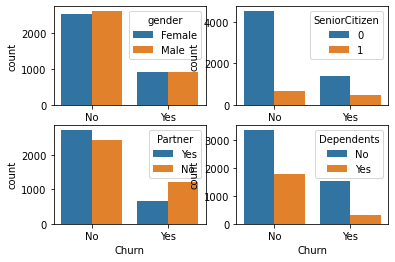

In [92]:
from telco import *
from utils import *

def graph_plots():
	churn     = df[df["Churn"] == "Yes"]
	not_churn = df[df["Churn"] == "No"]
	
	target_col = ["Churn"]
	
	cat_cols   = df.nunique()[df.nunique() < 6].keys().tolist()
	cat_cols   = [x for x in cat_cols if x not in target_col]
	num_cols   = [x for x in df.columns if x not in cat_cols + target_col]
	
	# # for all categorical columns plot pie
	# for i in cat_cols:
	# 	plot_pie(churn,not_churn,i)
	# 
	# # for all categorical columns plot histogram
	# for i in num_cols:
	# 	histogram(churn,not_churn,i)
	
	# scatter plot matrix
	# scatter_matrix(df)
	
	countplot(df,"Churn", cat_cols[:-4], n_max=4)

graph_plots()

In [93]:
def df_dist_details(df):
	for c in df.columns:
		print(c)
		for v in df['Churn'].unique():
			print('< '+str(v)+' >')
			print(df[c][df['Churn']==v].value_counts())
		print(end='\n\n')

df_dist_details(df)
df.columns

gender
< No >
Male      2625
Female    2549
Name: gender, dtype: int64
< Yes >
Female    939
Male      930
Name: gender, dtype: int64


SeniorCitizen
< No >
0    4508
1     666
Name: SeniorCitizen, dtype: int64
< Yes >
0    1393
1     476
Name: SeniorCitizen, dtype: int64


Partner
< No >
Yes    2733
No     2441
Name: Partner, dtype: int64
< Yes >
No     1200
Yes     669
Name: Partner, dtype: int64


Dependents
< No >
No     3390
Yes    1784
Name: Dependents, dtype: int64
< Yes >
No     1543
Yes     326
Name: Dependents, dtype: int64


tenure
< No >
72    356
1     233
71    164
2     115
70    108
     ... 
28     45
44     45
39     42
36     40
0      11
Name: tenure, Length: 73, dtype: int64
< Yes >
1     380
2     123
3      94
4      83
5      64
     ... 
45      6
72      6
62      5
63      4
64      4
Name: tenure, Length: 72, dtype: int64


PhoneService
< No >
Yes    4662
No      512
Name: PhoneService, dtype: int64
< Yes >
Yes    1699
No      170
Name: PhoneService, dtype: 

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Preprocessing

Categorical

In [94]:
no_int_colms = ['OnlineSecurity',
                'OnlineBackup',
                'DeviceProtection',
                'TechSupport',
                'StreamingTV',
                'StreamingMovies']

for c in no_int_colms:
	df[c].replace(to_replace='No internet service', value='No', inplace=True)
df['MultipleLines'].replace(to_replace='No phone service', value='No')

# ',,,,tenure,Contract,,PaymentMethod,MonthlyCharges,TotalCharges,'

yes_no_colms = ['Partner', 'Dependents','PhoneService','MultipleLines',
                ] + no_int_colms + ['PaperlessBilling', 'Churn']
for c in yes_no_colms:
	df[c]=df[c].map(lambda s:1 if s=='Yes' else 0)

df['gender']=df['gender'].map(lambda s:1 if s=='Male' else 0)

mult_val_colms = ['InternetService', 'Contract', 'PaymentMethod']
for c in mult_val_colms:
	df = pd.concat([df,pd.get_dummies(df[c], prefix=c)],axis=1)
	df.drop(columns=[c],axis=1, inplace=True)
	

Numeric

In [95]:
df.TotalCharges.replace(to_replace=" ", value="", inplace=True)
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='ignore')
df.TotalCharges.fillna(df.TotalCharges.mean(), inplace=True)

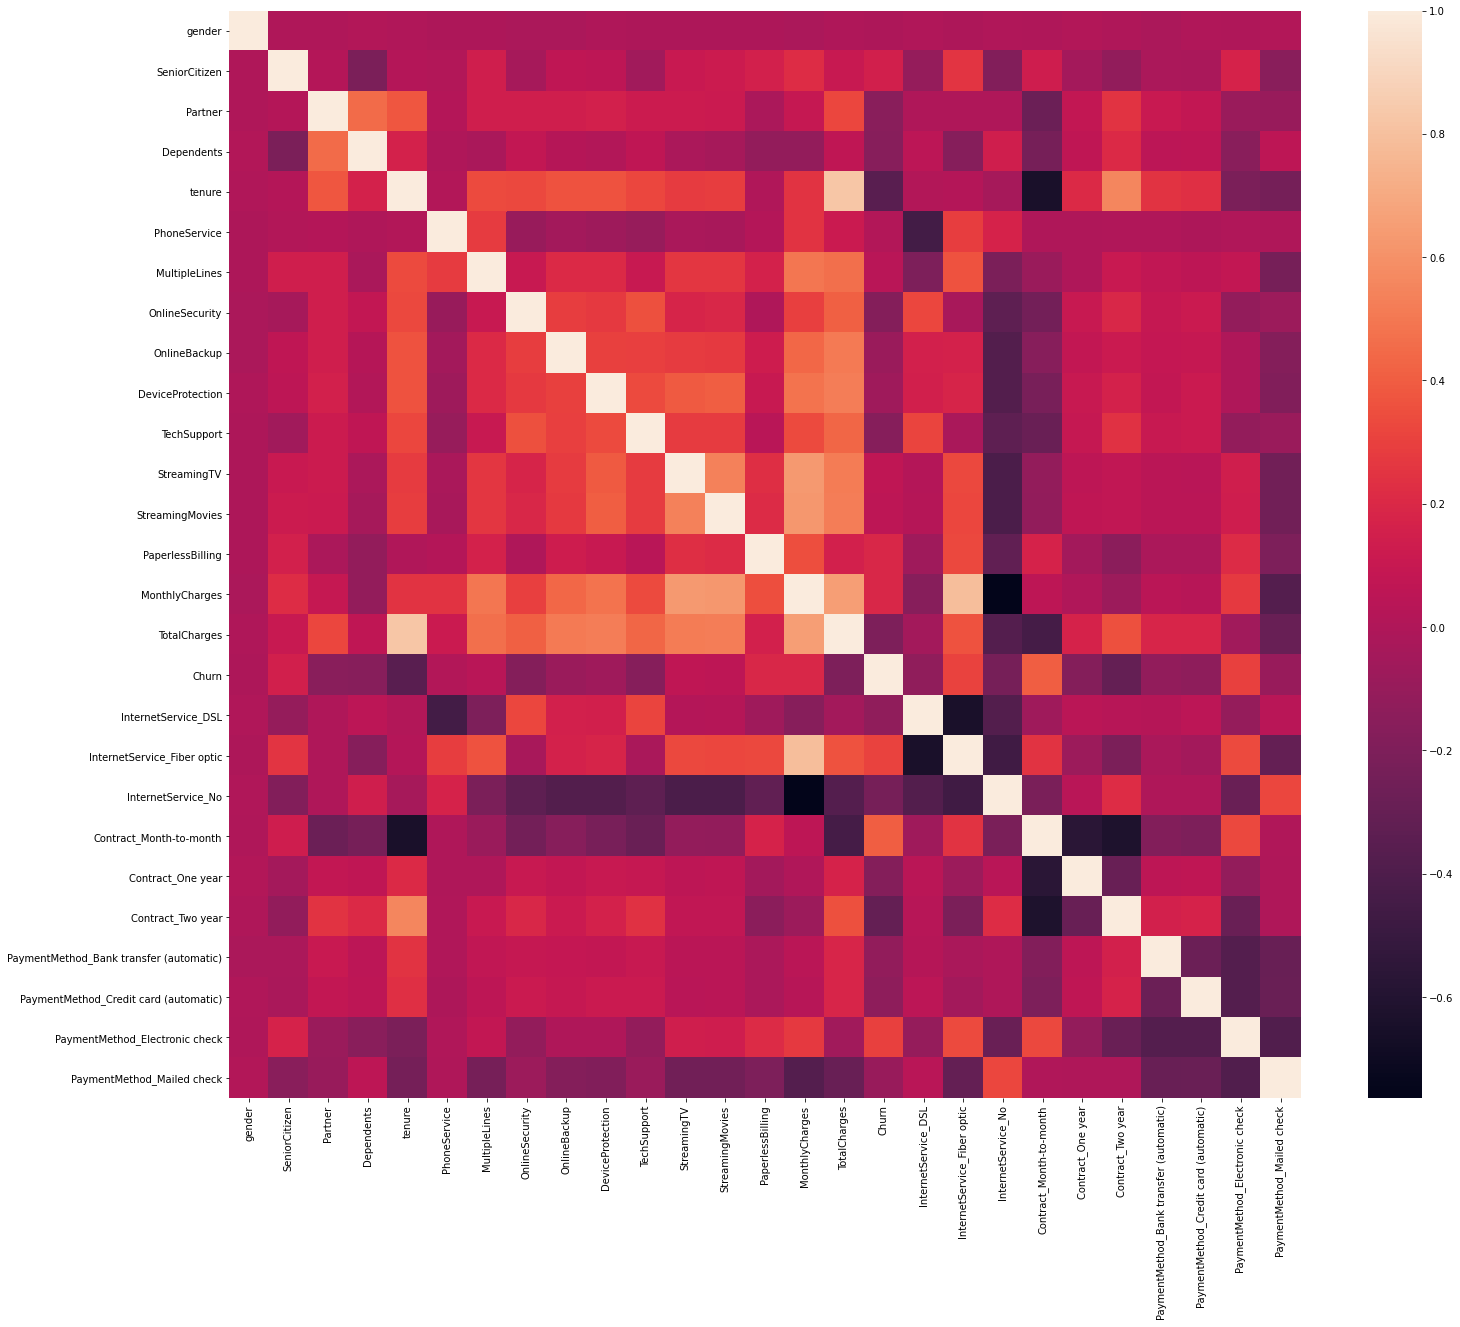

In [96]:
plt.figure(figsize = (24,20))
sns.heatmap(df.corr())

In [97]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from models.adaboost import AdaBoost
from sklearn.model_selection import train_test_split
K=15
D=1

X, y = df.drop(columns=['Churn']).to_numpy(), df['Churn'].to_numpy()
y[y==0]=-1

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)

model_ = AdaBoostClassifier(n_estimators=K, base_estimator=DecisionTreeClassifier(max_depth=D))
model_.fit(X_train,y_train)
print('scikit : ', model_.score(X_test,y_test))

model = AdaBoost(n_estimators=K, base_estimator=DecisionTreeClassifier(max_depth=D))
model.fit(X_train,y_train)
print('scratch: ', model.score(X_test,y_test))

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
dtc.score(X_test, y_test)

scikit :  0.8026969481902059
fitting 15 models
scratch:  0.7977288857345636


0.7437899219304471